# AUTOMATIC TICKET ASSIGNMENT

# Problem Statement

Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

# Business Value Proposition

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings

# Modeling Objective

Develop a model for automatic ticket assignment to the relevant team so that problem addressal can be done in an efficient manner that reduces time for resolution

# Libraries used

In [ ]:
!pip install spacy
!pip install nltk
pip install plotly==4.7.1
pip install cufflinks
!pip install gensim

In [59]:
# Utilities
import os
import zipfile, warnings
import sys
!{sys.executable} -m spacy download en
from time import time
import cv2

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Tools & Evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.manifold import TSNE

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
output_notebook()
import cufflinks
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import re # for applying Regex pattern to subject strings

# NLP toolkits
import spacy
import nltk as nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing import preprocessing
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.phrases import Phraser
from gensim.models import Phrases, CoherenceModel
from gensim.models import Word2Vec

# Sequential Modeling
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
import keras.backend as K
from keras import initializers
from keras.engine.topology import Layer, InputSpec
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Conv1D, MaxPooling1D
from keras.layers import Embedding, Activation, Dropout, Flatten, Bidirectional
from keras.layers import Permute, merge, Input, multiply, concatenate
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

symbolic link created for C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en <<===>> C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[+] Linking successful
C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


Loading BokehJS ...

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
os.chdir('D:\GreatLakes\Capstone\Python Code') # Set the working directory

### Milestone 1: Pre-Processing, Data Visualisation and EDA
● Exploring the given Data files
<br>● Understanding the structure of data
<br>● Missing points in data
<br>● Finding inconsistencies in the data
<br>● Visualizing different patterns
<br>● Visualizing different text features
<br>● Dealing with missing values
<br>● Text preprocessing
<br>● Creating word vocabulary from the corpus of report text data
<br>● Creating tokens as required

Read the csv file and see some records

In [3]:
df = pd.read_csv('input_data.csv')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
df.shape

(8500, 4)

There are 8500 rows and 4 columns

## Before Moving onto EDA, it's useful to eyeball the data for random rows

In [5]:
random_state=1
random_subset = df.sample(n=50)
print(random_subset)

                                      Short description  \
3936                                   erp access issue   
6803  persönliches laufwerk "adelhmk" nicht mehr ver...   
2543                                    password reset    
8245       link to ethics ethical moment does not work.   
913                 schreibrechte für ksdvp3, ce_leiter   
6023  check router wifi (router: sao-pollaurido-merc...   
4826  job Job_1427 failed in job_scheduler at: 09/09...   
5086                                    need vpn access   
3336                         markhtyingre email as junk   
3617                       engineering_tool not working   
585   activation of outlook email access on samsung ...   
2463                                         blank call   
4620          invalid incompletion error on so#24903890   
7690                             erp SID_34 locked out.   
5201                            unable to load outlook    
4921               unable to log in to engineering tool 

## Observations from Eye Balling:

Row 1081 has perhaps chinese characters; Row 1537 seems to be German - Thus the database comprises of Descriptions in Multiple Languages and we would need to translate these into English

Further the Description column has words like "received from", "from", "hello", "hallo" and perhaps other such words that do not add any value to the analysis and hence they need to be removed as part of the Stop words

Also the email id of the caller is given in the Description column (for e.g. Row 1976, 7456) and it is unlikely that would add value to the analysis and hence most likely these would need to be removed

# Language Translation

Given the problems with using Google API from within Python, Google Sheets was used for the translation. The Excel sheet was opened in Google Sheets and by applying the formulae "=DetectLanguage(Cell)" and "=GoogleTranslate(Cell, "Auto", en)", we were able to understand the language in which the text was as well as get the translation of the text to English respectively and the translated file was downloaded. From this point onward, the translated Excel sheet has been used and this Sheet is also being submitted as part of the project

In [6]:
new_df = pd.read_csv('input_data_translated.csv', encoding='mac_roman')
new_df.head()

,Short description,Description,Caller,Assignment group,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en


Checking for translation

In [7]:
print(df['Description'][1081])
print(new_df['Description'][1081])

print(df['Description'][1537])
print(new_df['Description'][1537])

打开已关闭的销售订单时，显示"不能在手动或分布事物方式下创建新的链接"
When you open sales orders have been closed, display "can not create new links in manual or distributed way things are."
probleme mit lan am rechner \ we_wu113 \ essa \wrcktgbd wzrgyunp
problems with lan on computer \ we_wu113 \ essa \ wrcktgbd wzrgyunp


The above shows that the Chinese and German have been translated into English

## EDA

Understanding of the columns is important in order to understand whether to retain/ drop some of them.

# Caller Column

This perhaps indicates the person who filed the ticket; it would be useful to understand the number of such callers (If there are many unique callers with low sample bases, then it might not make sense to include this column

In [8]:
new_df.Caller.nunique() # Understanding the unique no. of callers

2950

Thus across 8500 Rows, there are 2950 unique callers and hence each caller is unlikely to have a sufficient base for analysis. However would be interesting to check the counts of at least the callers who put in tickets more frequently

In [9]:
new_df.Caller.value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
jyoqwxhz clhxsoqy     51
efbwiadp dicafxhv     45
afkstcev utbnkyop     32
gzhapcld fdigznbk     30
mnlazfsr mtqrkhnx     28
uvrbhlnt bjrmalzi     27
entuakhp xrnhtdmk     25
vzqomdgt jwoqbuml     24
jionmpsf wnkpzcmv     24
bozdftwx smylqejw     23
utyeofsk rdyzpwhi     21
qasdhyzm yuglsrwx     21
rxoynvgi ntgdsehl     21
vbwszcqn nlbqsuyv     19
ugyothfz ugrmkdhx     17
hbmwlprq ilfvyodx     17
niptbwdq csenjruz     16
ughzilfm cfibdamq     16
pfzxecbo ptygkvzl     16
vfrdxtqw jfbmsenz     16
                    ... 
qayozbcd vwglmpjq      1
yxwniljk doveqpsy      1
kqvbrspl jyzoklfx      1
qzixratf wrygjncl      1
tmjowelq ojvkxlyd      1
hybegvwo dbgrtqhs      1
wbecophk uwntkiar      1
acwoflmg lvwmshcr      1
dxqwftir hbknpyzf      1


There are only 11 callers who have a sample base > 50; While the top caller has 810 records, the sample per caller diminishes rapidly; thus there does not seem to be any value in retaining this column and it will be dropped 

Let's see the description

In [10]:
new_df.describe().transpose()

,count,unique,top,freq
Short description,8498,7386,password reset,48
Description,8497,7751,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976
Language,8497,27,en,7733


Above description says below observations:
1. 'Short description' column has 2 blank values and 'Desciption' column has 3 blank values
2. Out of 8498 there are 7386 unique values in 'Short description' column, out of 8497 there are 7751 unique values in 'Description' column and out of 8500 there are 74 unique values in 'Assignment group' column which is target column. Also there are 27 unique languages in the database
3. "Password reset" is the top frequent value with 48 occurrences in 'Short description' column, "the" is the top frequent value with 56 occurrences in 'Description' column and "GRP_0" is the group which has maximum assignment of tickets i.e 3976. English is the most common language with 7733 records

Comments: In the Description Column 'the' by itself does not add any value since it would get removed as a stop word; hence useful to see what is Short Description that is in the rows with "the" in the Description Column

In [11]:
new_df[new_df.Description == 'the'].head(10)

,Short description,Description,Caller,Assignment group,Language
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,GRP_17,en
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,GRP_17,en
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,GRP_17,en
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,GRP_17,en
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,GRP_17,en
1476,reset passwords for bnoupaki cpeioxdz using pa...,the,bnoupaki cpeioxdz,GRP_17,en
1558,reset passwords for usa feathers using passwor...,the,lmqysdec ljvbnpqw,GRP_17,en
1693,reset passwords for eglavnhx uprodleq using pa...,the,eglavnhx uprodleq,GRP_17,en
1834,reset passwords for hybiaxlk lawptzir using pa...,the,hybiaxlk lawptzir,GRP_17,en
1850,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17,en


Most of the "the" in Description seem to be associated with "reset passwords" in the Short Description Column; thus in order to develop a reasonable model it points to the fact that it would be good to concatenate both these columns

Checking for the Data Types

In [12]:
new_df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
Language             object
dtype: object

# Understanding the Target Column

Let's see number of tickets assigned to each group

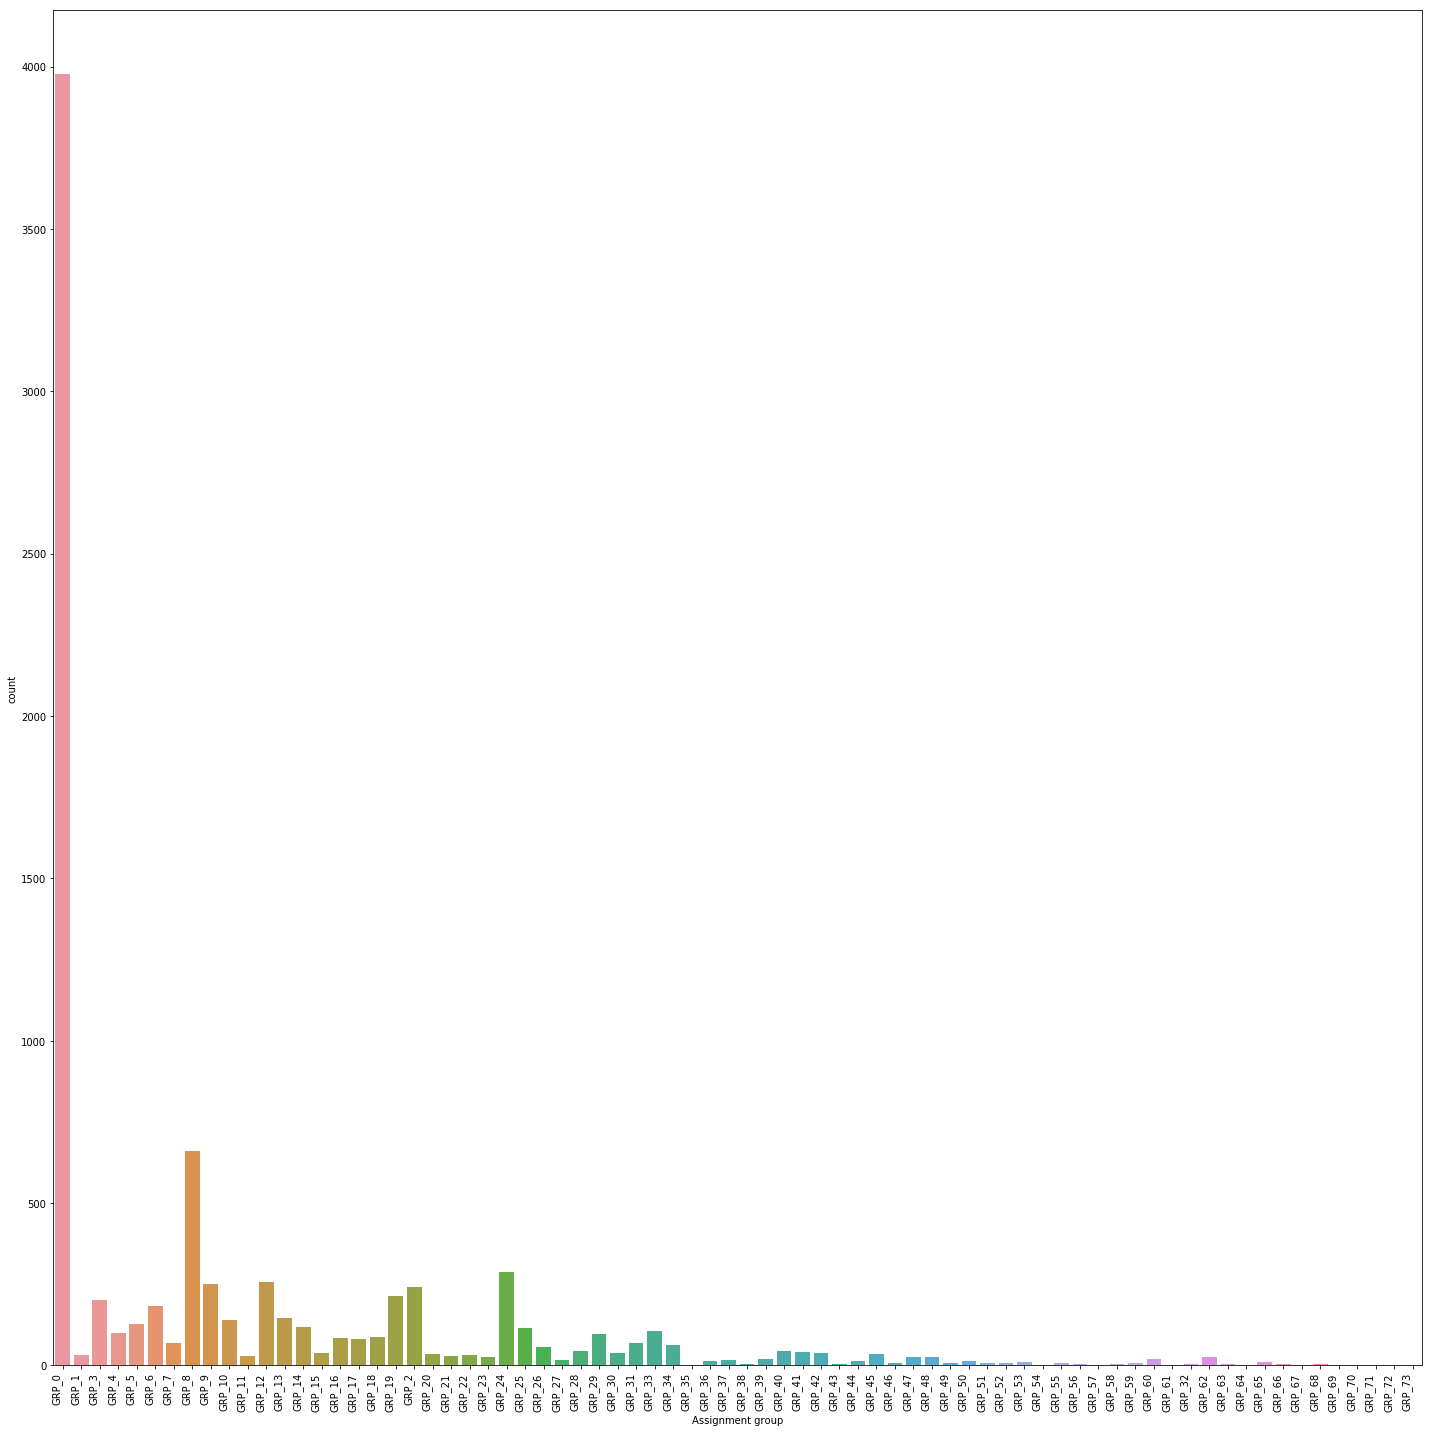

In [17]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.countplot(x = "Assignment group", ax=ax, data=new_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [112]:
print(new_df['Assignment group'].value_counts())

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
          ... 
GRP_44      15
GRP_36      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_59       6
GRP_49       6
GRP_46       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_38       3
GRP_56       3
GRP_58       3
GRP_68       3
GRP_63       3
GRP_54       2
GRP_72       2
GRP_71       2
GRP_57       2
GRP_69       2
GRP_73       1
GRP_61       1
GRP_67       1
GRP_64       1
GRP_70       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64


The Group variable has a very long tail and it might not be beneficial to keep the ones that have a low record base; One could potentially club the groups with low record base into 1 group called as "Others". Classic statistics state that beyond a sample of 30, distributions tend to be normal and thus this value could be set as a cut-off for a group to be included and all groups with a base of <30 can be combined into "Others"

Let's check for null values

In [18]:
new_df.isnull().apply(pd.value_counts)  

,Short description,Description,Caller,Assignment group,Language
False,8498,8497,8500.0,8500.0,8497
True,2,3,NaN,NaN,3


There are 2 null values in 'Short description' column and 3 in 'Description' column.There is no null value in target column.

If there are rows, with Null values for both, then we would need to remove them; however we need to check for the same

In [19]:
# Let's look at the rows with null values
new_df[pd.isnull(new_df).any(axis=1)]

,Short description,Description,Caller,Assignment group,Language
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34,en
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0,en
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0,NaN
6371,authorization add/delete members,NaN,hpmwliog kqtnfvrl,GRP_0,NaN
7397,browser issue :,NaN,fgejnhux fnkymoht,GRP_0,NaN


There are no records which have Null values for both Short Description and Description; Given that for prediction it is likely that both Columns would be used, replacement of Null values can be done with a blank string (as it is likely that both Short Description and Description would be concatenated while building the model)

In [20]:
# NULL replacement
new_df.fillna(str(), inplace=True)
new_df[pd.isnull(new_df).any(axis=1)]

,Short description,Description,Caller,Assignment group,Language


Now there is no null value in any column

Checking for Duplicates across Short Description and Description

In [21]:
df_common=new_df[new_df[["Short description","Description"]].apply(lambda x : x[0]==x[1],axis=1)].reset_index(drop=True).copy()

In [22]:
df_common.head()

,Short description,Description,Caller,Assignment group,Language
0,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en
1,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en
2,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en
3,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,en
4,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,en


In [23]:
df_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 5 columns):
Short description    2889 non-null object
Description          2889 non-null object
Caller               2889 non-null object
Assignment group     2889 non-null object
Language             2889 non-null object
dtypes: object(5)
memory usage: 112.9+ KB


Comments: this shows that out of the 8500 records, 2889 have the same information in both Short description and Description - This would point out that it is better to concatenate the two columns for the modeling stage

Language as a column is not required for the modeling but was just for understanding; dropping the Language Column

In [24]:
new_df=new_df.drop('Language',axis=1)
new_df.shape
new_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


# Data Understanding thus far

1. All text has been converted into English
2. Need to concatenate both the short Description and Description Columns
3. Long tails in "Assignment group" column need to be taken care of
4. Null values solved for by replacing with blank string
5. Need to remove email id's from text

# Next Steps

# Data Cleaning 

In this step there is a need to 
1. Convert all text to lower case
2. Remove numbers
3. Remove puntuations
4. Remove blank spaces
5. Remove stop words (along with other words identified earlier that would not contribute)
6. Remove email id's

In [25]:
# Fixing the different patterns
email_pat = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
punct_pat = r"[,|.|_|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
num_pat = r"(?<!)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def preText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    text = re.sub(email_pat, ' ', text, flags=re.IGNORECASE)
    # Remove all numbers
    text = re.sub(r'\d+',' ',text)# remove numbers
    text = re.sub(num_pat, ' ', text)
    # Replace all punctuations with blank space
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(punct_pat, " ", text, flags=re.MULTILINE)
    text = re.sub(r'\s+', ' ', text)
    # remove HTML tags
    text = re.sub('<.*?>', '', text)   
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    return text.strip()

In [26]:
# Checking to see how the cleaning function has worked for a record
print('\033[1mOriginal text:\033[0m')
print(new_df['Description'][0])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(preText(new_df['Description'][0]))

Original text:
-verified user details.(employee# & manager name)
-checked the user name in ad and reset the password.
-advised the user to login and check.
-caller confirmed that he was able to login.
-issue resolved.
____________________________________________________________________________________________________
Cleaned text:
verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved


Now given that The text seems to have been pre-processed correctly, applying it on the total database

In [27]:
new_df['Description'] = new_df['Description'].apply(preText)
new_df['Short description'] = new_df['Short description'].apply(preText)

# Verify the data
new_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


# Text Pre Processing

As first steps, we would be concatenating Short Description and Description columns (given that more than a fourth of records have exactly the same data in both of them)

In [28]:
new_df.insert(loc=4, 
              column='Total', 
              allow_duplicates=True, 
              value=list(new_df['Short description'].str.strip() + ' ' + new_df['Description'].str.strip()))

In [29]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee man...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings s...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot l...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


Comments: As seen in case 4, there is duplication and this needs to be removed

In [30]:
new_df["Total"] = new_df["Total"].apply(lambda x: ' '.join(pd.unique(x.split()))) # removing duplicates

In [31]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee man...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings s...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot o...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


# Lemmatization

We are using spaCY for this given that it also takes of POS and works well on cleaned data

In [32]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [33]:
# Checking to see how the lemmatizer function has worked for a record
print('\033[1mOriginal text:\033[0m')
print(new_df['Total'][0])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(new_df['Total'][0]))

Original text:
login issue verified user details employee manager name checked the in ad and reset password advised to check caller confirmed that he was able resolved
____________________________________________________________________________________________________
Lemmatized text:
login issue verify user detail employee manager name check the in ad and reset password advise to check caller confirm that be able resolve


In [34]:
# Applying on the database
new_df['Total'] = new_df['Total'].apply(lemmatizer)

# Verify the data
new_df.head()

,Short description,Description,Caller,Assignment group,Total
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


# Preparing list of Stop words

In [35]:
allstp=np.array(stopwords.words('english'))
allstp.size

179

In [36]:
#Creating an additional of stopwords that  we see as irrelevant to the modelling inputs
new_words=np.array(['yes','hi', 'receive','hello','sir','madam', 'best','morning','evening','afternoon' 'regards','thanks','from','greeting', 'forward','reply','will','please','see','help','able'])
new_words.size

20

In [37]:
stopwords=np.concatenate([allstp,new_words]) #Concatenating nltk list and our list of stopwords
stopwords.size

199

In [38]:
index_not = np.where(stopwords == 'not') # find index of 'not' in the stopwords
index_not

(array([118], dtype=int64),)

In [39]:
final_list=np.delete(stopwords, index_not)
final_list.size

198

In [40]:
#the cleaning process below removes the stopwords defined above as a string irrespective of whether it is part of another word. Example: it will remove "i" in input as "i" is a stopword. Hence, to prevent the same, we will append a space before and after every term to defined as a word
final_list1=[]
for i in final_list:
#     print("initial")
#     print(i)
    txt=i
    txt=" "+txt+" "
    i=txt
    final_list1.append(i)
#     print("final:")
#     print(i)
# final_list1

## Cleaning usernames and stop words from the descriptions

In [41]:
uniq=new_df['Caller'].unique()
print(uniq)
uniq.size

['spxjnwir pjlcoqds' 'hmjdrvpb komuaywn' 'eylqgodm ybqkwiam' ...
 'bjitvswa yrmugfnq' 'oybwdsgx oxyhwrfz' 'kqvbrspl jyzoklfx']


2950

In [ ]:
## We can use the same command for removing whatever stop words we want. Will append those terms to the uniq array using:
## np.append(uniq,stopword)

In [42]:
uniq1=np.concatenate([uniq,final_list1]) #preparing final list of terms that need to be deleted. This includes usernames and stopwords
uniq1.size

3148

In [43]:
new_df['Clean Description']=new_df['Total'].copy()

In [44]:
# print commands have been commented out due to issues in the IOrate. You can uncomment out the same in case you need the reference
s=" "
for key, value in new_df['Total'].iteritems():
    r=value
    
    if(pd.isnull(value)):
        s=''
    else:
#         print(key)
        for u in range(uniq1.size):
            if(r.find(uniq1[u])!=-1):
            
        #print(uniq[u])
#                 print('un found: ',uniq1[u])
                s = r.replace(uniq1[u],' ')
                r=s
#                 print('Key: ',key)
#                 print('Original string: ',r)
#                 print('Revised string: ',s)
            else:
                s=r
#     print(key)
#     print(r)
#     print(s)
    new_df.at[key,'Clean Description']= s
#     print(key)

In [45]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


Comments: Now the Column "Clean Description" has completely clean data where all the stop words, names of people removed and we can explore this data

# EDA on Description

Lets understand the total number of words in the corpus

In [55]:
cumulative_words = {}
cumulative_column = []

for x in new_df["Clean Description"].values:
    cumulative_words.update(dict.fromkeys(set(x.lower().split())))
    cumulative_column.append(cumulative_words.keys())

In [56]:
new_df["Column B"] = cumulative_column
new_df["Column C"] = new_df["Column B"].apply(len)

In [57]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description,Column B,Column C
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,"(detail, resolve, issue, employee, advise, man...",10327
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,"(detail, resolve, issue, employee, advise, man...",10327
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,"(detail, resolve, issue, employee, advise, man...",10327
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,"(detail, resolve, issue, employee, advise, man...",10327
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,"(detail, resolve, issue, employee, advise, man...",10327


Comments: We have a total of 10327 unique words in our corpus

In [58]:
# Dropping the Column B & C
new_df=new_df.drop({'Column B','Column C'}, axis=1)
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


# Understanding n-grams

In [62]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(new_df['Clean Description'], 25)
df1 = pd.DataFrame(common_words, columns = ['Clean Description' , 'count'])
df1.groupby('Clean Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black',title='Top 25 Unigrams')

In [63]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(new_df['Clean Description'], 25)
df2 = pd.DataFrame(common_words, columns = ['Clean Description' , 'count'])
df2.groupby('Clean Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 bigrams')


In [64]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(new_df['Clean Description'], 25)
df3 = pd.DataFrame(common_words, columns = ['Clean Description' , 'count'])
df3.groupby('Clean Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 trigrams')


Understanding whether the length of the ticket has an implication on the group it belongs to

In [65]:
#creating a column for determining word count
new_df['word_count'] = new_df['Clean Description'].str.split().map(len)

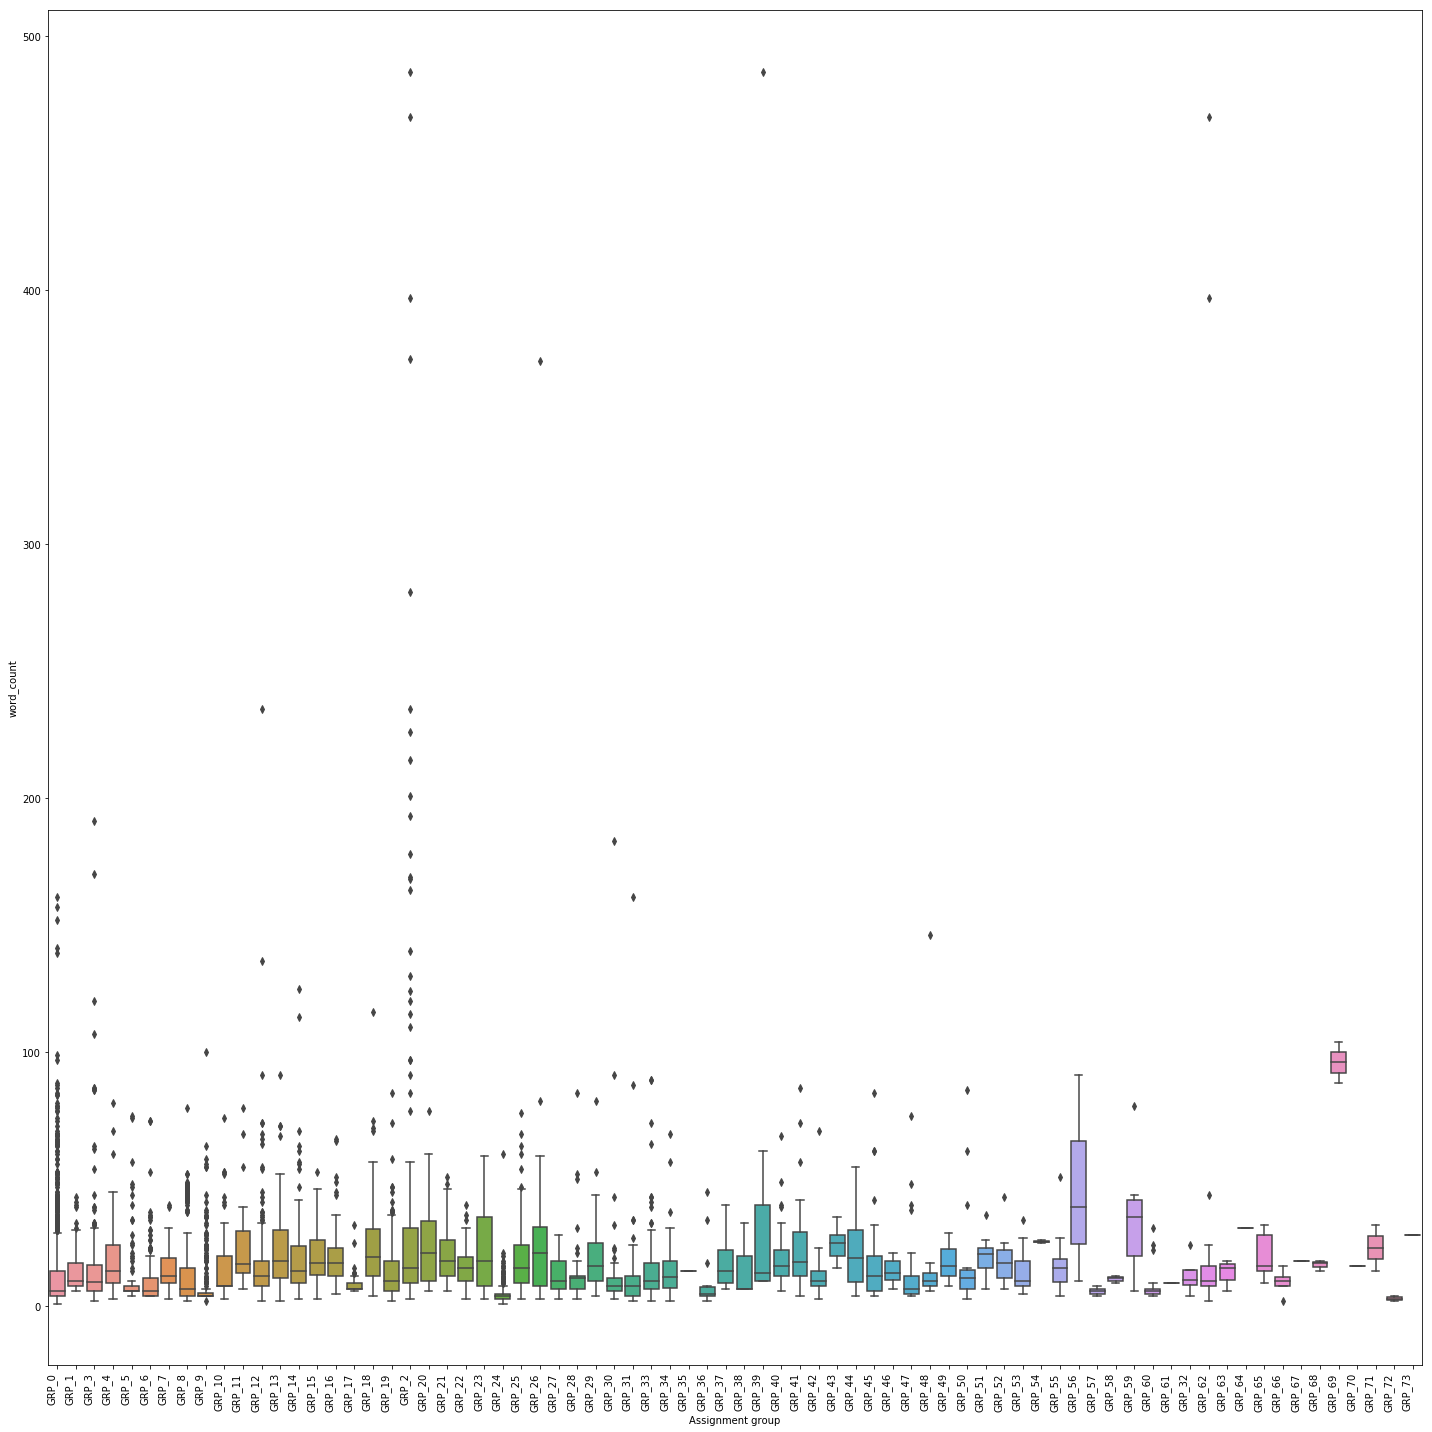

In [66]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.boxplot(x="Assignment group", y="word_count",ax=ax, data=new_df) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Excepting for some groups like group 56 & 70 that stand out in terms of the large no. of words used, difficult to see a pattern emerging across other groups

# Thematic analysis of data

In [97]:
df_theme=new_df.copy() #Creating a new dataframe

In [98]:
df_theme.head(5)

,Short description,Description,Caller,Assignment group,Total,Clean Description,word_count,New grouping
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,17,GRP_0
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,12,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,6,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,5,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,2,GRP_0


In [101]:
# creating a corpus from Clean Decsription Column
corpus_text = '\n'.join(df_theme[:]['Clean Description'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]

In [102]:
sentences[5]

['unable', 'log', 'engineering', 'tool', 'skype']

In [103]:
def clean(s): #removing additional punctuation
    return [w.strip(',."!?:;()\'') for w in s]
sentences = [clean(s) for s in sentences if len(s) > 0]

In [104]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, size=8000, window=3, min_count=3, workers=4) 
#Tried a size of 100, 1000 and 2000 but the similarity qualitatively did not seem all that good

In [105]:
model.save("word2vec.mdl") # Saving the model for later use

In [106]:
vectors = model.wv #keeping only the vector values
len(model.wv.vocab)

3135

In [107]:
print(vectors.similarity('access', 'login')) #taking sample value and analysing the relationships
print(vectors.similarity('access', 'skype'))

0.93913275
0.975186


In [108]:
vectors.most_similar('vpn')

[('platform', 0.9793061017990112),
 ('collaboration', 0.9783681631088257),
 ('connect', 0.976498007774353),
 ('tologin', 0.9747147560119629),
 ('alt', 0.9720966219902039),
 ('doug', 0.9705219864845276),
 ('march', 0.968325138092041),
 ('detail', 0.9640535712242126),
 ('caller', 0.9639269709587097),
 ('roboworker', 0.9623376131057739)]

So we can see strong connects with <b>platform</b>, <b>Collaboration</b>, <b>connect</b>,<b>tologin</b>  - words which are typically used for a connectivity session which is what a VPN is used for. This implies that our vectors seem to be defined well

In [111]:
term = ['reset','account']
for i in term:
    print('\n')
    print('For term: \033[1m',i,'\033[0m the most similar words are:')
    for word, similarity in model.most_similar(positive=i, topn=10): #Identifying similar words
            print (word, round(similarity, 4))



For term:  reset  the most similar words are:
password 0.9656
passwords 0.9533
user 0.9529
management 0.9511
manager 0.9441
windows 0.9394
login 0.9368
use 0.9361
ad 0.9283
produktion 0.9247


For term:  account  the most similar words are:
unlock 0.9975
lock 0.9965
erp 0.9937
windows 0.9747
ad 0.9714
unlocked 0.9645
system 0.9604
password 0.9551
tool 0.9502
login 0.949


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



# Making it easy to visualize word relationships

In [112]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda k: -k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
# print(ordered_terms)
# create a DataFrame with the vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(model.wv.syn0norm[term_indices, :], index=ordered_terms)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).



In [113]:
word_vectors

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
,-0.008200,-0.004274,0.007369,0.002968,0.002071,0.008801,-0.001482,0.004184,-0.005004,0.015172,...,0.008955,0.010702,0.011363,-0.003172,-0.010541,-0.028656,0.008682,0.012150,-0.003976,-0.006338
not,-0.014580,-0.005491,0.007220,0.008396,-0.003233,0.008646,-0.002785,0.009224,0.005558,0.018986,...,0.003407,0.010763,0.005201,-0.015919,-0.008925,-0.015553,0.002417,0.007530,0.002180,-0.012525
password,-0.014561,-0.009291,0.001716,0.007289,-0.004867,0.004147,-0.005295,0.002033,0.001133,0.011751,...,0.011042,0.015335,0.005390,-0.012515,-0.008048,-0.019716,0.008608,0.007078,-0.001281,-0.011512
erp,-0.016242,-0.010345,-0.000480,0.005536,-0.005607,0.002996,-0.006145,-0.005761,0.003316,0.009516,...,0.009934,0.014764,0.007027,-0.018371,-0.004719,-0.014782,0.002812,0.004615,0.001645,-0.011892
job,-0.008651,-0.001555,-0.004076,-0.001120,-0.004862,0.002705,0.002882,-0.007530,0.005956,0.011128,...,-0.001708,0.001051,-0.001987,-0.021489,0.000793,0.004713,-0.010177,-0.000716,0.004099,-0.007206
tool,-0.011865,-0.009342,-0.001504,0.005254,-0.003472,0.005583,-0.006662,-0.000416,0.006649,0.016287,...,0.009960,0.010881,0.000766,-0.019515,-0.002002,-0.016077,0.006048,0.004214,0.004135,-0.014657
issue,-0.015772,-0.006304,0.005411,0.006732,-0.003413,0.008267,-0.003869,0.005201,0.005445,0.018389,...,0.004397,0.011000,0.005984,-0.017564,-0.007555,-0.014874,0.001849,0.007921,0.001594,-0.013562
scheduler,-0.008531,-0.001188,-0.003922,-0.001104,-0.005031,0.002717,0.003521,-0.006577,0.005959,0.011360,...,-0.002262,0.000548,-0.002183,-0.021260,0.000675,0.004915,-0.010356,-0.000444,0.003768,-0.006824
work,-0.014140,-0.002805,0.006086,0.011184,-0.008162,0.003416,0.002514,0.016811,0.002897,0.017283,...,0.001308,0.010734,-0.002394,-0.010437,-0.014324,-0.011632,0.001650,0.004375,-0.001095,-0.009012
fail,-0.008738,-0.001691,-0.003742,-0.001179,-0.004922,0.002983,0.002825,-0.007226,0.006206,0.011175,...,-0.001702,0.000872,-0.001763,-0.021593,0.000650,0.004871,-0.010370,-0.000546,0.004171,-0.007238


In [114]:
tsne_input = word_vectors

In [115]:
tsne = TSNE()
tsne_vectors = tsne.fit_transform(tsne_input.values)

In [116]:
tsne_vectors

array([[ 12.129013 , -73.66862  ],
       [ -3.3575761, -76.012924 ],
       [-10.908725 , -82.0562   ],
       ...,
       [ 35.849987 , -44.7367   ],
       [ 16.187765 ,   7.0224175],
       [  5.2726274, -65.492256 ]], dtype=float32)

In [117]:
tsne_vectors1 = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=['x_coord', 'y_coord'])
tsne_vectors1['word'] = tsne_vectors1.index

In [118]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors1)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title='t-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= ('pan, wheel_zoom, box_zoom,'
                           'box_select, reset'),
                   active_scroll='wheel_zoom')
tsne_plot.add_tools( HoverTool(tooltips = '@word') )
# draw the words as circles on the plot
tsne_plot.circle('x_coord', 'y_coord', source=plot_data,
                 color='blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color='black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

# Combining Assignment Groups

We had earlier mentioned that a lof assignment groups had very less records and thus we would need to combine all such groups into a "Other" Group.

In [67]:
new_df['New grouping']=new_df['Assignment group'].copy()

In [68]:
cols = ['New grouping']
for col in cols:
    val = new_df[col].value_counts()
    y = val[val < 30].index # all groups with less than 30 records will be combined into others
    new_df[col] = new_df[col].replace({x:'other' for x in y})

In [69]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description,word_count,New grouping
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,17,GRP_0
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,12,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,6,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,5,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,2,GRP_0


In [70]:
new_df['New grouping'].value_counts()

GRP_0     3976
GRP_8      661
other      357
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
Name: New grouping, dtype: int64

Thus Now from the earlier 74 groups, we now have only 36 groups - with a group called as "others". While the groups are quite unbalanced in terms of no. of records in each group, at this stage, we would not be undertaking any balancing exercise but check the accuracies of the models and of required at the next stage try and balance the groups.

## Milestone 2: Model Building
● Building a model architecture which can classify.
<br>● Trying different model architectures by researching state of the art for similar tasks.
<br>● Train the model
<br>● To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

### Let's do some analysis that can help us to set the appropriate parameter values for model

This is meant to be a trial run of an initial model to understand likely accuracies. At this stage, we have two columns of interest, "Clean Description" and "New grouping". A new dataframe will be created using only these two columns and a trial model would be run

In [71]:
model_df = new_df[{'Clean Description','New grouping'}]

In [72]:
model_df.head()

,Clean Description,New grouping
0,login issue verify user detail employee manage...,GRP_0
1,outlook team meeting skype etc not appear cale...,GRP_0
2,can not log vpn not best,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [73]:
model_df.shape

(8500, 2)

In [74]:
model_df.describe().transpose()

,count,unique,top,freq
Clean Description,8500,6634,job fail scheduler from,445
New grouping,8500,36,GRP_0,3976


## Get the Length of each line and find the maximum length
As different lines are of different length. We need to pad the our sequences using the max length.

In [75]:
#creating a column for determining word count
model_df['word_count'] = model_df['Clean Description'].str.split().map(len)

In [76]:
model_df.head()

,Clean Description,New grouping,word_count
0,login issue verify user detail employee manage...,GRP_0,17
1,outlook team meeting skype etc not appear cale...,GRP_0,12
2,can not log vpn not best,GRP_0,6
3,unable access hr tool page,GRP_0,5
4,skype error,GRP_0,2


In [77]:
# understanding the max no. of words
max (model_df['word_count'])

486

Thus the maximum no. of words is 486

In [78]:
np.mean (model_df['word_count'])

13.77070588235294

In [79]:
np.std (model_df['word_count'])

20.593414440671673

Given that the average no. of words is ~ 14 and standard deviation is ~21, we could safely fix the max number of words at 100 without too much loss in data

# Set Different Parameters for the model. 

In [80]:
max_features = 10000
maxlen = 100
embedding_size = 200

## Apply Keras Tokenizer on "Clean Description" column
First creating a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column model_df['Clean Description'] using .fit_on_texts()

In [81]:
tokenizer = Tokenizer(num_words=max_features,filters= '!"#$%&()*+,-./:;<=>?@[\]^_`{|}\n“~”')

In [82]:
tokenizer.fit_on_texts(model_df['Clean Description'])

# Defining X and y for the model.

In [83]:
# First to Create a target categorical column
model_df['New grouping'] = model_df['New grouping'].astype('category').cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
Clean Description    8500 non-null object
New grouping         8500 non-null int8
word_count           8500 non-null int64
dtypes: int64(1), int8(1), object(1)
memory usage: 141.2+ KB


In [84]:
model_df.head()

,Clean Description,New grouping,word_count
0,login issue verify user detail employee manage...,0,17
1,outlook team meeting skype etc not appear cale...,0,12
2,can not log vpn not best,0,6
3,unable access hr tool page,0,5
4,skype error,0,2


In [85]:
X = tokenizer.texts_to_sequences(model_df['Clean Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(model_df['New grouping'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8500
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  30   6 102  11  89 129  59
  25  32 207  10   2 161  32 257 142  78]
Number of Labels:  8500
0


## Get the Vocabulary size 
Use tokenizer.word_index.

In [86]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d\nDocuments count: %d' % (vocab_size, tokenizer.document_count))

Vocabulary size: 10328
Documents count: 8500


Note:

That + 1 is because of reserving padding (i.e. index zero).

## Get Glove Word Embeddings

In [221]:
glove_file = "glove.6B.zip"

In [222]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file and creating a weight matrix for words in training docs

In [87]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 200))


for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        

Loaded 400000 word vectors.


# Splitting the data into training and validation samples

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

## Create and Compile your Model
Usinga  Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with softmax activation for binary classification.


In [89]:
# Build the model
embedding_dim = 200

model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(CuDNNLSTM(128)))
#model.add(Bidirectional(CuDNNLSTM(128, return_sequences=True)))
#model.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
#model.add(Bidirectional(CuDNNLSTM(32)))
model.add(Dropout(0.25))
model.add(Dense(units=36, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          2065600   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 200)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               337920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                9252      
Total params: 2,412,772
Trainable params: 2,412,772
Non-trainable params: 0
_________________________________________________________________
None


# Fitting the model with a batch size of 100 and validation_split = 0.2.

In [90]:
# Converting to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [91]:
batch_size = 100
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)


Train on 5440 samples, validate on 1360 samples
Epoch 1/20
5440/5440 [==============================] - 7s 1ms/step - loss: 2.4032 - accuracy: 0.4906 - val_loss: 2.0145 - val_accuracy: 0.5390
Epoch 2/20
5440/5440 [==============================] - 4s 746us/step - loss: 1.8557 - accuracy: 0.5511 - val_loss: 1.7470 - val_accuracy: 0.5676
Epoch 3/20
5440/5440 [==============================] - 5s 942us/step - loss: 1.6060 - accuracy: 0.5908 - val_loss: 1.6015 - val_accuracy: 0.5875
Epoch 4/20
5440/5440 [==============================] - 9s 2ms/step - loss: 1.4235 - accuracy: 0.6241 - val_loss: 1.4852 - val_accuracy: 0.6029
Epoch 5/20
5440/5440 [==============================] - 14s 3ms/step - loss: 1.2848 - accuracy: 0.6548 - val_loss: 1.4204 - val_accuracy: 0.6118
Epoch 6/20
5440/5440 [==============================] - 20s 4ms/step - loss: 1.1681 - accuracy: 0.6722 - val_loss: 1.4323 - val_accuracy: 0.6272
Epoch 7/20
5440/5440 [==============================] - 21s 4ms/step - loss: 1.06

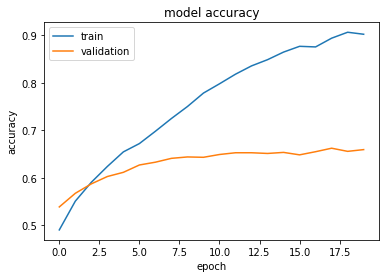

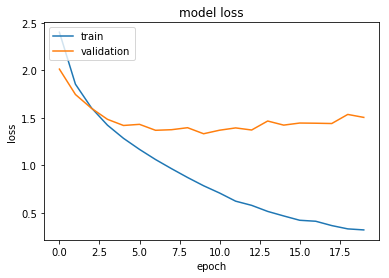

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model clearly overfits, on validation data it has an accuracy of only  ~ 66% whereas train accuracy is 90%

## Prediction on Test Data

In [94]:
# Generic method to print the classification report
def classification_summary(y_test, y_pred, y_proba):
    print('\033[1mModel accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('_'*80)
    print('\033[1mConfusion matrix:\033[0m\n %s' % (confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))))
    print('_'*80)
    print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))
    print('_'*80)

In [95]:
# Analyze Classification Summary
y_proba = model.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 58.82%
________________________________________________________________________________
Confusion matrix:
 [[731   0   0 ...   0   0  10]
 [  0   0   0 ...   0   0   0]
 [  7   0  17 ...   0   0   1]
 ...
 [ 47   0   1 ...  76   0   1]
 [ 47   0   0 ...   1   2   0]
 [ 41   1   0 ...   4   0  12]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       795
           1       0.00      0.00      0.00         6
           2       0.74      0.61      0.67        28
           3       0.17      0.17      0.17         6
           4       0.66      0.37      0.48        51
           5       0.43      0.34      0.38        29
           6       0.47      0.33      0.39        24
           7       0.40      0.25      0.31         8
           8       0.50      0.35      0.41        17
           9       0.93      0.88      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.



For the smaller groups, the accuracy is really low; we can potentially think of merging groups with a record base of less than 50 (instead of 30)

# Instead of Glove using Word2Vec

Perhaps more appropriate in this situation since quite a few of the words like http, vpn, etc might not be present in the Glove Vocabulary and thus creating a vocabulary for this specific study might be better and we will use the Word2Vec model saved earlier

# Modeling with Word2Vec

In [119]:
# Load the Word2Vec model
wmodel = Doc2Vec.load('word2vec.mdl')

In [120]:
w2v_weights = wmodel.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 3135 - Embedding Dim: 8000


In [121]:
# CREATE the MODEL

# Samples of categories with less than this number of samples will be ignored
DROP_THRESHOLD = 10000
model_wv = Sequential()
model_wv.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv.add(SpatialDropout1D(0.2))
model_wv.add(Bidirectional(LSTM(128)))
#model_wv.add(Bidirectional(LSTM(128, return_sequences=True)))
#model_wv.add(Bidirectional(LSTM(64)))
model_wv.add(Dropout(0.25))
#model.add(Dense(units=2, activation='sigmoid')) # found softmax to work better
model_wv.add(Dense(units=36, activation='softmax'))
model_wv.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8000)         25080000  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 8000)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               8324096   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 36)                9252      
Total params: 33,413,348
Trainable params: 8,333,348
Non-trainable params: 25,080,000
_________________________________________________________________
None


In [123]:
batch_size = 100
epochs = 20
history = model_wv.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Train on 5440 samples, validate on 1360 samples
Epoch 1/20
5440/5440 [==============================] - 305s 56ms/step - loss: 1.8256 - accuracy: 0.5482 - val_loss: 1.7986 - val_accuracy: 0.5544
Epoch 2/20
5440/5440 [==============================] - 305s 56ms/step - loss: 1.7717 - accuracy: 0.5581 - val_loss: 1.7611 - val_accuracy: 0.5463
Epoch 3/20
5440/5440 [==============================] - 307s 56ms/step - loss: 1.7248 - accuracy: 0.5642 - val_loss: 1.7097 - val_accuracy: 0.5632
Epoch 4/20
5440/5440 [==============================] - 308s 57ms/step - loss: 1.6725 - accuracy: 0.5647 - val_loss: 1.7163 - val_accuracy: 0.5632
Epoch 5/20
5440/5440 [==============================] - 308s 57ms/step - loss: 1.6489 - accuracy: 0.5686 - val_loss: 1.6687 - val_accuracy: 0.5662
Epoch 6/20
5440/5440 [==============================] - 308s 57ms/step - loss: 1.6093 - accuracy: 0.5752 - val_loss: 1.6351 - val_accuracy: 0.5618
Epoch 7/20
5440/5440 [==============================] - 308s 57ms/step

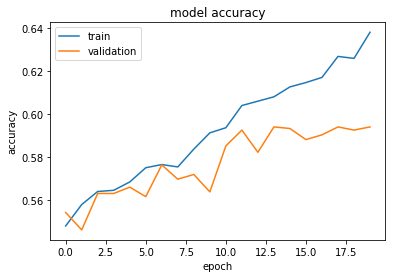

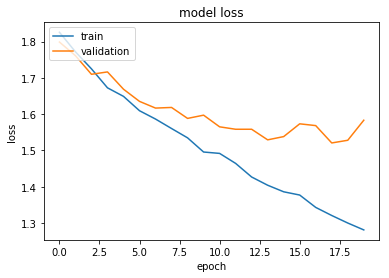

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
# Analyze Classification Summary
y_proba = model_wv.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 48.24%
________________________________________________________________________________
Confusion matrix:
 [[782   0   0 ...   0   0   0]
 [  3   0   0 ...   3   0   0]
 [ 19   0   7 ...   2   0   0]
 ...
 [ 49   0   1 ...  76   0   0]
 [ 50   0   0 ...   0   1   0]
 [ 67   1   0 ...   3   0   0]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       795
           1       0.00      0.00      0.00         6
           2       0.88      0.25      0.39        28
           3       0.00      0.00      0.00         6
           4       0.75      0.12      0.20        51
           5       0.00      0.00      0.00        29
           6       0.50      0.08      0.14        24
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        17
           9       0.92      0.75      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.



# Summary of Model Fits:

The same bi-directional LSTM model (with all parameters the same) has been applied to both the Glove as well as the WOrd2Vec Embedding.

The Glove based LSTM gives a higher validation accuracy of ~ 66% vis-a-vis the Word2Vec based one which has a validation accuracy of 59%    